In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer/survey lung cancer.csv


In [2]:
lung_cancer_file_path = '/kaggle/input/lung-cancer/survey lung cancer.csv'

In [3]:
lung_cancer_data = pd.read_csv(lung_cancer_file_path)

In [4]:
lung_cancer_data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
lung_cancer_data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
lung_cancer_data.shape

(309, 16)

# **Checking for Null Values**

In [7]:
lung_cancer_data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

**Dropping Null Values From the Data Set**

In [8]:
lung_cancer_data = lung_cancer_data = lung_cancer_data.dropna(axis=0)

In [9]:
# label encoding
lung_cancer_data.replace({"LUNG_CANCER":{'YES':0,'NO':1}},inplace=True)
# printing the first 5 rows of the dataframe
lung_cancer_data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


Below since the values 'M' for Male and 'F' for Female can't be used as data values, we will be turning them into 1's and 0's in the cell below. The gender male, would have the value 0, and the gender female would have the value 1. 

In [10]:
# label encoding
lung_cancer_data.replace({"GENDER":{'M':0,'F':1}},inplace=True)
# printing the first 5 rows of the dataframe
lung_cancer_data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


# **Data Visualization**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

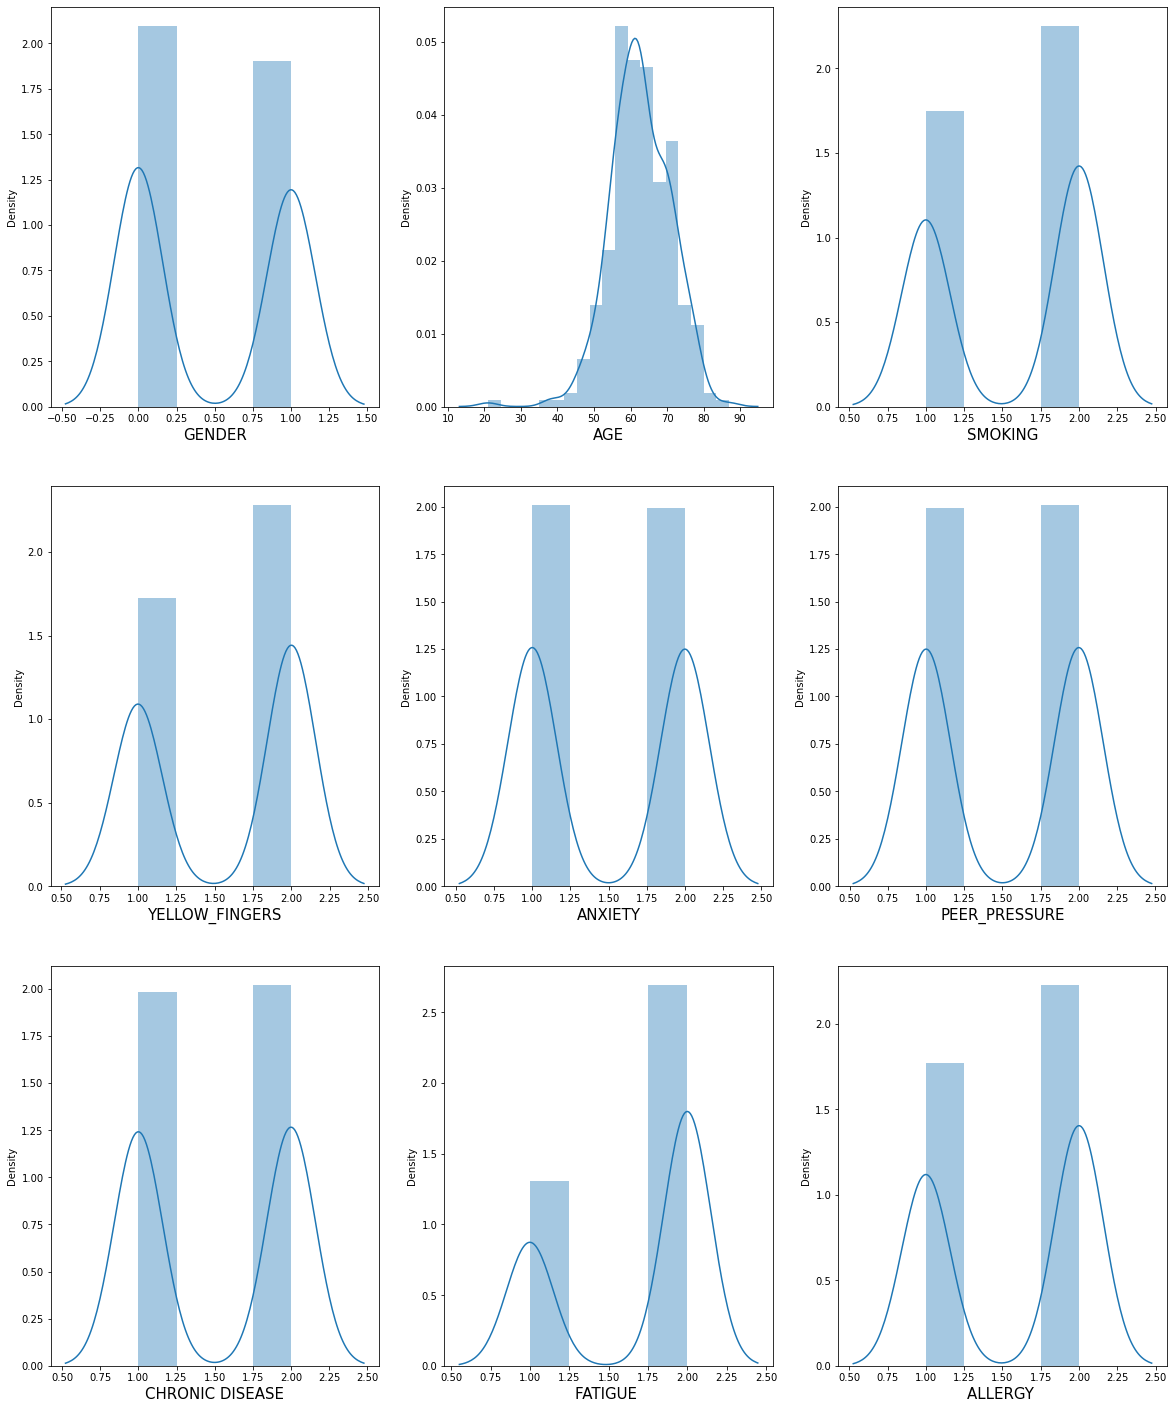

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20, 25))
plotnumber = 1
for column in lung_cancer_data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(lung_cancer_data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

The Lung Cancer Data value will be the target value the model will try and predict whether or not the patient will have lung cancer

In [12]:
y = lung_cancer_data.LUNG_CANCER

Below will be the features for our problem, these are teh inputs or "x-values" our model will use to predict whether or not the patient has lung cancer

In [13]:
lung_cancer_datafeatures = ['AGE', 'GENDER', 'SMOKING', 'ANXIETY', 'CHRONIC DISEASE', 'ALCOHOL CONSUMING', 'SHORTNESS OF BREATH']

In [14]:
X = lung_cancer_data[lung_cancer_datafeatures]

In [15]:
X.describe()

,AGE,GENDER,SMOKING,ANXIETY,CHRONIC DISEASE,ALCOHOL CONSUMING,SHORTNESS OF BREATH
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,0.475728,1.563107,1.498382,1.504854,1.556634,1.640777
std,8.210301,0.500221,0.496806,0.500808,0.500787,0.497588,0.480551
min,21.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,0.000000,2.000000,1.000000,2.000000,2.000000,2.000000
75%,69.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [16]:
X.head

<bound method NDFrame.head of      AGE  GENDER  SMOKING  ANXIETY  CHRONIC DISEASE  ALCOHOL CONSUMING  \
0     69       0        1        2                1                  2   
1     74       0        2        1                2                  1   
2     59       1        1        1                1                  1   
3     63       0        2        2                1                  2   
4     63       1        1        1                1                  1   
..   ...     ...      ...      ...              ...                ...   
304   56       1        1        1                2                  2   
305   70       0        2        1                1                  2   
306   58       0        2        1                1                  2   
307   67       0        2        2                1                  2   
308   62       0        1        1                1                  2   

     SHORTNESS OF BREATH  
0                      2  
1                      2  


In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
lung_cancer_model = DecisionTreeRegressor(random_state = 1)

In [19]:
lung_cancer_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [20]:
print(X.head())

   AGE  GENDER  SMOKING  ANXIETY  CHRONIC DISEASE  ALCOHOL CONSUMING  \
0   69       0        1        2                1                  2   
1   74       0        2        1                2                  1   
2   59       1        1        1                1                  1   
3   63       0        2        2                1                  2   
4   63       1        1        1                1                  1   

   SHORTNESS OF BREATH  
0                    2  
1                    2  
2                    2  
3                    1  
4                    2  


In [21]:
print(lung_cancer_model.predict(X.head()))

[0.  0.  1.  0.5 0.5]


In [22]:
predictions = lung_cancer_model.predict(X)
print(predictions)

[0.  0.  1.  0.5 0.5 0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  0.  0.
 0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  1.  0.  0.5 0.
 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
 0.  0.  0.5 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  1.  1.  0.  1.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
 0.5 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5
 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.
 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.

In [23]:
print(lung_cancer_model.predict(X.head()))

[0.  0.  1.  0.5 0.5]


# **Model Validation**

In [24]:
from sklearn.model_selection import train_test_split
# separating into train and testing
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)
print("Shape of X_train is " ,X_train.shape)
print("Shape of X_test  is " ,X_test.shape)
print("Shape of Y_train is " ,y_train.shape)
print("Shape of Y_test  is " ,y_test.shape)

Shape of X_train is  (247, 7)
Shape of X_test  is  (62, 7)
Shape of Y_train is  (247,)
Shape of Y_test  is  (62,)


In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# **Decision Tree Regressor (Classifier)**

We are going to use the decision tree regressor as it more accurate to predict models. Previously we used Logistic Regression to generalize the dataset. 

In [26]:
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state = 1)

#lung_cancer_model = DecisionTreeRegressor() 
#lung_cancer_model.fit(train_X, y)

In [27]:
lung_cancer_model = DecisionTreeRegressor(random_state=1) 

# Fit Lung Cancer Model with the training data.
lung_cancer_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [28]:
val_predictions = lung_cancer_model.predict(val_X)

In [29]:
# print the top few validation predictions
print(X.head())
# print the top few actual prices from validation data
print()

   AGE  GENDER  SMOKING  ANXIETY  CHRONIC DISEASE  ALCOHOL CONSUMING  \
0   69       0        1        2                1                  2   
1   74       0        2        1                2                  1   
2   59       1        1        1                1                  1   
3   63       0        2        2                1                  2   
4   63       1        1        1                1                  1   

   SHORTNESS OF BREATH  
0                    2  
1                    2  
2                    2  
3                    1  
4                    2  



In [30]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_predictions, val_y) 

# uncomment following line to see the validation_mae
print(val_mae)

0.15384615384615385


**Mean Absolute Error is a value of 0.1538 (The Lower the Better only for Error)**

In [31]:
from sklearn.metrics import mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor

In [32]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dtc = DecisionTreeClassifier()
dtc.fit(train_X,train_y)

y_pred = dtc.predict(val_X)

dtc_train_accuracy = accuracy_score(train_y, dtc.predict(train_X))
dtc_test_accuracy = accuracy_score(val_y, val_predictions)

print(f"Training Accuracy of Decision Tree Model is: {dtc_train_accuracy}")
print(f"Testing Accuracy of Decision Tree Model is: {dtc_test_accuracy}")

Training Accuracy of Decision Tree Model is: 0.9913419913419913
Testing Accuracy of Decision Tree Model is: 0.8461538461538461


The Decision Tree Classifier has a 99% accuracy with the training model, but only a measely 84% training accuracy with the testing model. We need to use better classifiers.

In [35]:
from sklearn.model_selection import GridSearchCV 

In [36]:
grid_params = {
    'criterion':['gini', 'entropy'],
    'max_depth':[3,5,7,10],
    'min_samples_split':range(2,10,1),
    'min_samples_leaf': range(2,10,1)
}

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(train_X, train_y)

print(grid_search.best_params_)
print(grid_search.best_score_)

dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)
dtc_train_accuracy = accuracy_score(train_y, dtc.predict(train_X))
dtc_test_acc = accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.0s


{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.852913968547641


[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:    7.7s finished


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# **Logistic Prediction Model**

In [39]:
forest_model = RandomForestRegressor(random_state = 1)
forest_model.fit(train_X, train_y)
lung_preds = forest_model.predict(val_X)
print("Validation MAE for Random Forest Model is: {}".format(mean_absolute_error(val_y, lung_preds)))

Validation MAE for Random Forest Model is: 0.19742460317460317


***The Random Forest Prediction Model produced a value of 0.19742460317460317 still good, but not good enough***

Below we are going to split the training and validation sets to reduce the number of errors

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.8866396761133604
Test Accuracy of Logistic Regression Model is 0.8709677419354839


In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        54
           1       0.00      0.00      0.00         8

    accuracy                           0.87        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.76      0.87      0.81        62



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression is the easiest and most efficient way of implementing machine learning to predict the following values which we want to find. Our model was able to find the optimal path to find whether or not 

[Text(482.8846153846154, 475.65000000000003, 'X[5] <= 1.5\nentropy = 0.557\nsamples = 231\nvalue = [201, 30]'),
 Text(257.53846153846155, 339.75, 'X[3] <= 1.5\nentropy = 0.772\nsamples = 106\nvalue = [82, 24]'),
 Text(128.76923076923077, 203.85000000000002, 'X[0] <= 59.5\nentropy = 0.984\nsamples = 40\nvalue = [23, 17]'),
 Text(64.38461538461539, 67.94999999999999, 'entropy = 0.961\nsamples = 13\nvalue = [5, 8]'),
 Text(193.15384615384616, 67.94999999999999, 'entropy = 0.918\nsamples = 27\nvalue = [18, 9]'),
 Text(386.3076923076923, 203.85000000000002, 'X[4] <= 1.5\nentropy = 0.488\nsamples = 66\nvalue = [59, 7]'),
 Text(321.9230769230769, 67.94999999999999, 'entropy = 0.7\nsamples = 37\nvalue = [30, 7]'),
 Text(450.69230769230774, 67.94999999999999, 'entropy = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(708.2307692307693, 339.75, 'X[6] <= 1.5\nentropy = 0.278\nsamples = 125\nvalue = [119, 6]'),
 Text(643.8461538461538, 203.85000000000002, 'X[1] <= 0.5\nentropy = 0.544\nsamples = 48\nv

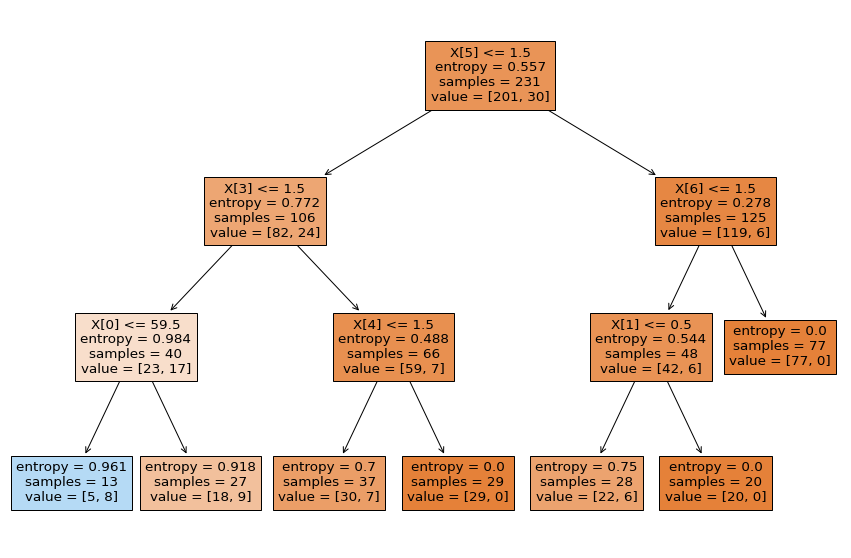

In [42]:
from sklearn import tree 
plt.figure(figsize = (15,10))
tree.plot_tree(dtc,filled = True)

As shown above, this model will utitlize the Decision Tree Classifier Model as its more accurate. This is due to the fact that logistic regression only generalizes the data, and finds a generalized answer. A decision tree regressor on the otherhand is more specific and utilizes everything to create a more specific answer to the problem. 

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

0.1081651404151404


In [44]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 1000, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 10000)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.9190283400809717
Test Accuracy of Random Forest Model is 0.8870967741935484


The training model has a 91% accuracy with the training model and an 88% accurate model with the trandom forests

In [45]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(n_estimators=10)

# Train
rand_clf.fit(iris.data, iris.target)
# Extract single tree
estimator = rand_clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


from IPython.display import Image
Image(filename = 'tree.png')


The Random Forest Classifier is the most accurate model boasting an 88% accuracy being the most accurate model possible. This model is the most efficient way to determine whether or not a patient has lung cancer based on their behavior and symptoms. 

I got this code to visualize Random Forest Classifier's from this website. https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
All other code is provided in the pytorch and scikit learning from the documentation https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Some portions of code (displaying data, turning data to 1's and 0's) were from these links